# Ventas de Verano 2020 de Wish

## Preprocesamiento de datos

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
df=pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
etiquetas=pd.read_csv("unique-categories.sorted-by-count.csv")

Aquí tenemos nuestros datos en donde se utilizan dos archivos, el primero "summer-products-with-rating-and-performance_2020-08" es donde se enceuntran nuestros principales datos ya que tiene las caracteristicas del producto según la página de wish en donde vienen el precio,nombre del producto, vendedor, calificación, etc.

Por otro lado tenemos que en "unique-categories.sorted-by-count.csv" se encuentran las etiquetas con las cuales están organizados los productos de nuestra base de datos y también nos ayudarán en el proceso.

In [3]:
print(df.shape)
print(etiquetas.shape)

(1573, 43)
(2620, 2)


La base de datos de las caracteristicas tiene 1573 filas con 43 columnas y el de las etiquetas 2620 filas y 2 columnas

In [4]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
etiquetas.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


In [6]:
df.tail()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.0,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.0,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.0,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08
1572,Pantalon de yoga pour femmes à la mode Slim Fi...,Fashion Women Yoga Pants Slim Fit Fitness Runn...,7.0,6,EUR,100,1,4.07,14,8.0,...,7023,4.235939,5a409cf87b584e7951b2e25f,0,NaN,https://www.wish.com/c/5e857321f53c3d2d8f25e7ed,https://contestimg.wish.com/api/webimage/5e857...,5e857321f53c3d2d8f25e7ed,summer,2020-08


In [7]:
etiquetas.tail()

,count,keyword
2615,1,2014menshort
2616,1,"2,piece dress sets"
2617,1,"2,Piece Swimsuit"
2618,1,#fashion #shorts
2619,1,#Summer Clothes


In [8]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [9]:
etiquetas.columns

Index(['count', 'keyword'], dtype='object')

In [10]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [11]:
etiquetas.dtypes

count       int64
keyword    object
dtype: object

El análisis previo de los datos antes de iniciar las modificaciones es importante para tener una idea general de la estructura de los datos, identificar los tipos de variables existentes y determinar lo que es posible analizar de estas, reconocer aquellos datos de interés para continuar con su análisis, y descartar los datos no deseados

Ahora comenzando con la limpieza quitaremos columnas que no tienen información de nuestro interes explicados a continuación:

- currency_buyer.- Se elimina esta columna ya que no nos interesa la moneda además se usa la misma al estar situada en euros

- rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count .- Se eliminan ya que utilizaremos solamente el rating ya promediado

- badges_count.- No nos interesa mucho el saber cuántas tiene sino cuales son las que se poseen

- product_variation_size_id.- Las omitimos ya que se muestran muchas tallas diferentes y hay distintos tipos de productos

- inventory_total.- Los inventarios son mayores de 50 y solo se muestra ese valor

- merchant_title.- No es de interés el nombre público del vendedor

- merchant_name.- No es de interés el nombre de usuario del vendedor

- product_url.- Solo sirve para la consulta de los datos pero no es de interés en el análisis

- merchant_profile_picture.- No es de interés saber la foto de perfil del vendedor

- product_picture .- No es determinante ver la foto del producto 

- theme.- Queda aclarado en la base de datos que todos son de verano

- crawl_month.- Todos son ubicados en el mismo mes que es Agosto

In [12]:
Datos_PIA=df.drop(['currency_buyer','rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count','badges_count','product_variation_size_id','inventory_total','merchant_title', 'merchant_name','product_url', 'merchant_profile_picture','product_picture','theme','crawl_month'],axis=1)

Se cambio el nombre de la columna por uno mas corto

In [13]:
Datos_PIA=Datos_PIA.rename(columns={"uses_ad_boosts":"uses_ads"})

In [14]:
Datos_PIA.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ads', 'rating', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'has_urgency_banner', 'urgency_text', 'origin_country',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_id'],
      dtype='object')

Observamos los valores de estas columnas donde el texto es relevante en nuestro trabajo

In [15]:
print(Datos_PIA.shipping_option_name.unique())
print(Datos_PIA.urgency_text.unique())
print(Datos_PIA.merchant_info_subtitle.unique())

['Livraison standard' 'Envio Padrão' 'Standart Gönderi' 'Standardversand'
 'Envío normal' 'Standardowa wysyłka' 'الشحن القياسي' 'Expediere Standard'
 'การส่งสินค้ามาตรฐาน' 'Standard Shipping' 'ការដឹកជញ្ជូនតាមស្តង់ដារ'
 'Livraison Express' 'Стандартная доставка' 'Spedizione standard'
 'Ekspresowa wysyłka']
['Quantité limitée !' nan 'Réduction sur les achats en gros']
['(568 notes)' '83 % avis positifs (17,752 notes)'
 '86 % avis positifs (295 notes)' ... '(4,080 notes)'
 '86 % avis positifs (210 notes)' '90 % avis positifs (7,023 notes)']


Se procede a verificar que datos se tienen Na

In [16]:
Datos_PIA.isnull()

,title,title_orig,price,retail_price,units_sold,uses_ads,rating,rating_count,badge_local_product,badge_product_quality,...,countries_shipped_to,has_urgency_banner,urgency_text,origin_country,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1570,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1571,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [17]:
etiquetas.isnull()

,count,keyword
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2615,False,False
2616,False,False
2617,False,False
2618,False,False


Como el data frame de etiquetas no tiene datos nulos, no sufrirá cambios

In [18]:
etiquetas.isnull().any()

count      False
keyword    False
dtype: bool

In [19]:
Datos_PIA.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
units_sold                      False
uses_ads                        False
rating                          False
rating_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
has_urgency_banner               True
urgency_text                     True
origin_country                   True
merchant_info_subtitle           True
merchant_rating_count           False
merchant_rating                 False
merchant_id                     False
merchant_has_profile_picture    False
product_id  

Como se mustra arriba, se señalan en que columnas hay datos nulos y abajo se tiene la suma de cuántos hay.
Esto nos ayuda a enfocarnos en las columnas product_color, has_urgency_banner, urgency_text, origin_country y merchant_info_subtitle 

In [20]:
Datos_PIA.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ads                           0
rating                             0
rating_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
has_urgency_banner              1100
urgency_text                    1100
origin_country                    17
merchant_info_subtitle             1
merchant_rating_count              0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
product_id                         0
d

Rellenamos los espacio vacíos

In [21]:
Datos_PIA_limpio=Datos_PIA.fillna(0)

Se cambian los ceros de estas columnas ya que nos es más util mostrar aquí que no hay ninguna selección

In [22]:
Datos_PIA_limpio.urgency_text=Datos_PIA_limpio.urgency_text.replace(0,"ninguno")
Datos_PIA_limpio.product_color=Datos_PIA_limpio.product_color.replace(0,"ninguno")
Datos_PIA_limpio.origin_country=Datos_PIA_limpio.origin_country.replace(0,"ninguno")
Datos_PIA_limpio.merchant_info_subtitle=Datos_PIA_limpio.merchant_info_subtitle.replace(0,"ninguno")

Algo que tenemos que considerar es que nos interesa cambiar los valores de la columna "merchant_info_subtitle",ya que es un enunciado con la reputación pero en algunos casos no viene el porcentaje así que se asignará un 0 a pesar de tener reseñas

In [23]:
Detalles=list(Datos_PIA_limpio.merchant_info_subtitle)

Aquí hacemos una lista y nos interesa tener el número a lado del porcentaje ya que es lo positivo de las reseñas

In [24]:
for i in range(0,len(Detalles)):   
    auxiliar=Detalles[i]
    flag= "%" in auxiliar
    if flag==True:
        auxiliar2=auxiliar.replace(" ","")
        posicion=auxiliar2.find("%")
        Detalles[i]=float(auxiliar[(posicion-2):posicion])/100
    else:
        Detalles[i]=0

Hacemos el cambio de los datos

In [25]:
Datos_PIA_limpio["merchant_info_subtitle"]=Detalles
print(Datos_PIA_limpio["merchant_info_subtitle"])

0       0.00
1       0.83
2       0.86
3       0.00
4       0.85
        ... 
1568    0.90
1569    0.00
1570    0.86
1571    0.77
1572    0.90
Name: merchant_info_subtitle, Length: 1573, dtype: float64


Finalmente ya guardamos nuestros datos que vamos a usar en un nuevo archivo csv

In [26]:
Datos_PIA_limpio.to_csv("summer-products-limpio.csv",index=False)

A continuación creamos las siguientes agrupaciones de la base de datos a partir de las etiquetas que tengan en común. Tomamos las 5 etiquetas más frecuentes para crear 5 bases de datos que contienen esta etiqueta

In [27]:
only_summer_tags=Datos_PIA_limpio[Datos_PIA_limpio["tags"].str.contains("Summer")]
only_womens_fashion_tags=Datos_PIA_limpio[Datos_PIA_limpio["tags"].str.contains("Women's Fashion")]
only_fashion_tags=Datos_PIA_limpio[Datos_PIA_limpio["tags"].str.contains("Fashion")]
only_women_tags=Datos_PIA_limpio[Datos_PIA_limpio["tags"].str.contains("Women")]
only_casual_tags=Datos_PIA_limpio[Datos_PIA_limpio["tags"].str.contains("Casual")]

Observamos que el tamaño de la base de datos es al menos igual al mostrado en "unique-categories.sorted-by-count.csv", por ejemplo, la palabra "fashion" aparece también en la etiqueta "Women's Fashion"

In [28]:
print(only_fashion_tags.shape)

(1495, 27)


Guardamos esta base de datos como csv en la dirección de las demás bases de datos

In [29]:
only_fashion_tags.to_csv("only_fashion_tags.csv",index=False)

Otro tipo de agrupación es enfocarnos en aquellos datos que cumplan con un criterio de selección. Por ejemplo, podemos seleccionar solo los productos que consideramos exitosos a partir de un mínimo número de ventas y mínimo rating, o una agrupación de productos con al menos una insignia

In [30]:
best_selling=Datos_PIA_limpio[Datos_PIA_limpio["units_sold"]>=5000]
best_selling["units_sold"]

1       20000
3        5000
6       50000
9        5000
14      20000
        ...  
1557    20000
1558    10000
1560     5000
1567    20000
1568    10000
Name: units_sold, Length: 520, dtype: int64

In [31]:
highest_rated=Datos_PIA_limpio[Datos_PIA_limpio["rating"]>=4]
highest_rated["rating"]

3       4.03
5       5.00
25      4.15
26      4.03
27      4.29
        ... 
1558    4.12
1559    4.05
1567    4.25
1568    4.08
1572    4.07
Name: rating, Length: 597, dtype: float64

In [32]:
best_products=Datos_PIA_limpio[(Datos_PIA_limpio["units_sold"]>=5000)&(Datos_PIA_limpio["rating"]>=4)]
best_products.to_csv("best_products.csv",index=False)
print(best_products.shape)

(199, 27)


In [33]:
badged_products=Datos_PIA_limpio[Datos_PIA_limpio["badge_local_product"]+Datos_PIA_limpio["badge_product_quality"]
                                 +Datos_PIA_limpio["badge_fast_shipping"]!=0]
badged_products.to_csv("badged_products.csv",index=False)
print(badged_products.shape)

(151, 27)


Estas agrupaciones serán de utilidad para facilitar la visualización y el análisis estadístico solamente un subconjunto de datos, seleccionado previamente a partir de este formato de agrupación

## Visualización de datos

Estadistica básica

In [34]:
Datos_PIA_limpio['price'].mean()

8.325371900826434

In [35]:
Datos_PIA_limpio['price'].median()

8.0

El promedio del precio de los productos de verano es de 8.32, y el 50% es menor a 8

In [36]:
Datos_PIA_limpio['retail_price'].mean()

23.28862047043865

In [37]:
Datos_PIA_limpio['uses_ads'].sum()

681

In [38]:
Datos_PIA_limpio['units_sold'].min()

1

In [39]:
Datos_PIA_limpio['units_sold'].max()

100000

In [40]:
Datos_PIA_limpio['units_sold'].mean()

4339.005085823268

Obtenemos el rango en el que se mueven las unidades vendidas, ademas de que en promedio los productos venden 4339.005, lo que podria un número de referencia para ver si un producto esta por encima de venta de unidades 

In [41]:
Datos_PIA_limpio['rating'].mean()

3.8208963763509174

In [42]:
Datos_PIA_limpio['rating'].min()

1.0

In [43]:
Datos_PIA_limpio['rating'].max()

5.0

In [44]:
Datos_PIA_limpio['rating'].median()

3.85

In [45]:
Datos_PIA_limpio['rating_count'].mean()

889.659249841068

Realizamos algunas estadísticas que creimos necesarias para observar rangos y puntos de partida para algun analisis futuro.

In [46]:
Datos_PIA_limpio["units_sold"].describe()

count      1573.000000
mean       4339.005086
std        9356.539302
min           1.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: units_sold, dtype: float64

In [47]:
Datos_PIA_limpio["rating"].describe()

count    1573.000000
mean        3.820896
std         0.515374
min         1.000000
25%         3.550000
50%         3.850000
75%         4.110000
max         5.000000
Name: rating, dtype: float64

In [48]:
Datos_PIA_limpio["price"].describe()

count    1573.000000
mean        8.325372
std         3.932030
min         1.000000
25%         5.810000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

In [49]:
Datos_PIA_limpio["merchant_rating"].describe()

count    1573.000000
mean        4.032345
std         0.204768
min         2.333333
25%         3.917353
50%         4.040650
75%         4.161797
max         5.000000
Name: merchant_rating, dtype: float64

Visualizamos una descripcion de algunas columnas que creemos relevantes

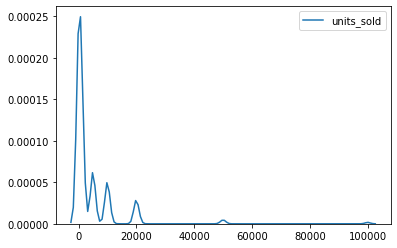

In [50]:
import matplotlib as plt
import seaborn as sns
sns.kdeplot(Datos_PIA_limpio.units_sold)

Visualizamos la distribucion de las unidades vendidas, para ver el comportamiento de estos datos

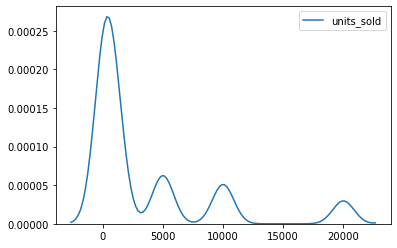

In [51]:
sns.kdeplot(Datos_PIA_limpio.query("units_sold<30000").units_sold)

Acotamos el rango de unidades vendidas para tener una mejor visualizacion de los datos mas comunes

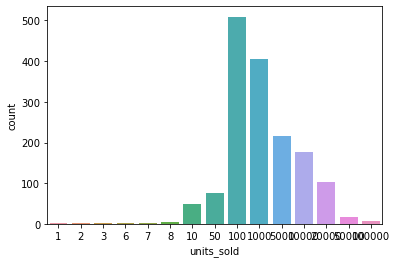

In [52]:
sns.countplot(Datos_PIA_limpio['units_sold'])

El grafico de barras nos muestra cuantos productos tuvieron tal cantidad de ventas, podemos observar que la moda de unidades vendidas es 100.

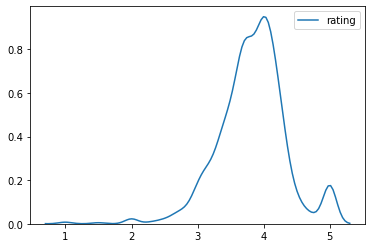

In [53]:
sns.kdeplot(Datos_PIA_limpio.rating)

Observamos la distribucuon de nuestros datos de raiting, notando un ligero sesgo a la derecha y una mayor concentracion de los datos entre 3 y 4.5

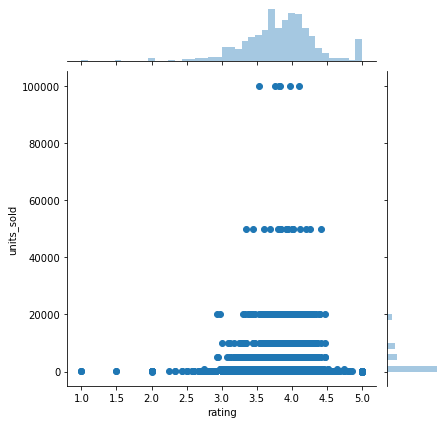

In [54]:
sns.jointplot(x='rating', y='units_sold', data=Datos_PIA_limpio)

Inferimos que puede haber cierta correlacion entre el raiting y las unidades vendidas,y creimos que este grafico podria ayudar a visualizar ademas de que nos muestra el histrograma de cada eje.

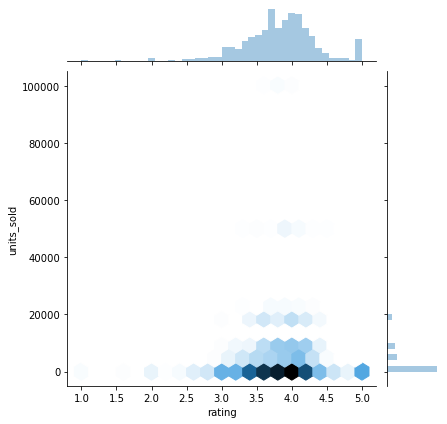

In [55]:
sns.jointplot(x="rating",y="units_sold",data=Datos_PIA_limpio,kind="hex",gridsize=20)

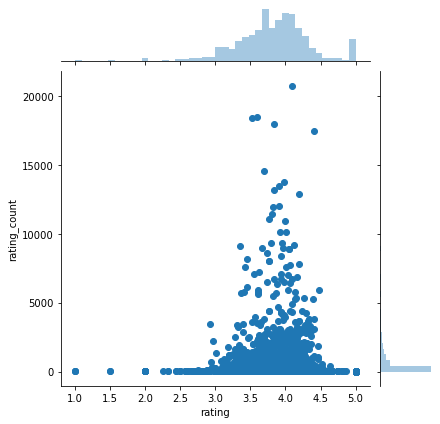

In [56]:
sns.jointplot(x='rating', y='rating_count', data=Datos_PIA_limpio)

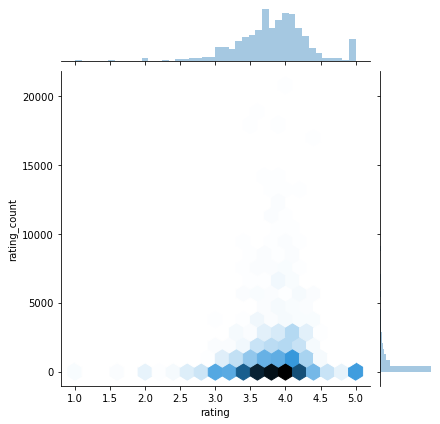

In [57]:
sns.jointplot(x="rating",y="rating_count",data=Datos_PIA_limpio,kind="hex",gridsize=20)

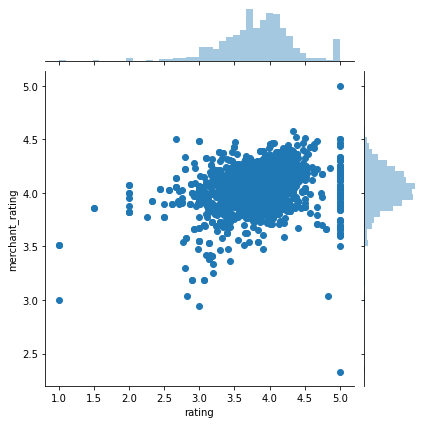

In [58]:
sns.jointplot(x='rating', y='merchant_rating', data=Datos_PIA_limpio)

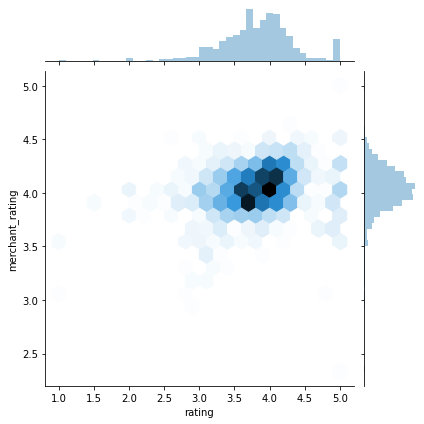

In [59]:
sns.jointplot(x="rating",y="merchant_rating",data=Datos_PIA_limpio,kind="hex",gridsize=20)

Realizamos estos graficos de coeficientes de correlacion con distintas columnas que inferimos pudieran tener cierta relacion como resultado no obtenemos alguna correlacion lineal en nuestras variables pero notamos cierta concentracion de los datos

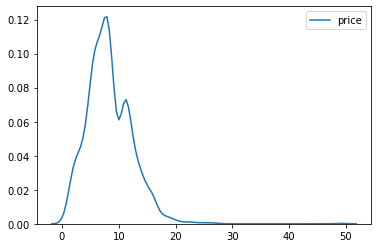

In [60]:
sns.kdeplot(Datos_PIA_limpio.price)

Visualizamos la distribucion del precio la cual tiene cierto sesgo a la izquiera y la mayor concentracion de sus datos estan entre 0 y 20.

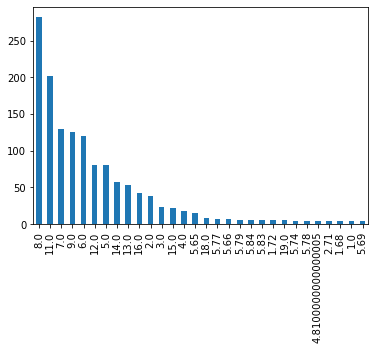

In [61]:
Datos_PIA_limpio['price'].value_counts().head(30).plot.bar()

Visualizamos los primeros 30 precios mas comunes, donde la moda de precio es igual a 8 US

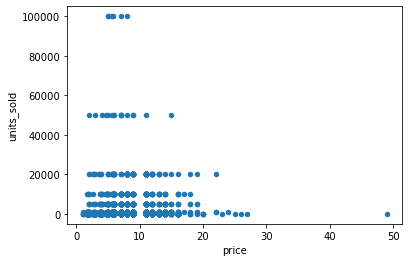

In [62]:
Datos_PIA_limpio[Datos_PIA_limpio['price'] < 50].sample(1550).plot.scatter(x='price', y='units_sold')

Realizamos un grafico de dispercion entre el precio y las unidades vendidas notando que los precios que tuvieron mas exito estan entre 8 y 10, y los precios superiores a 20, tienen pocas unidades vendidas o hasta nulas, lo que nos hace pensar que un precio por encima de 20 podria no tener buena aceptacion por parte de los clientes

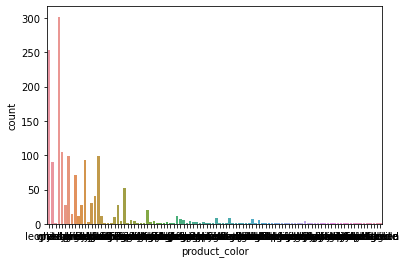

In [63]:
sns.countplot('product_color',data=Datos_PIA_limpio)

Graficamos los colores de los productos de verano que se venden con mayor frecuencia en la temporada, al ser una variacion grande de colores no nos permite visualizar de la mejor manera los datos

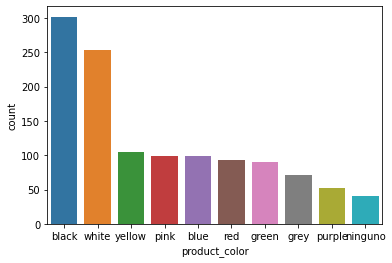

In [64]:
sns.countplot('product_color',data=Datos_PIA_limpio,
              order=Datos_PIA_limpio['product_color'].value_counts().iloc[0:10].index)

Visualizamos los primeros 10 colores con mayor frecuencia notando que el blanco y negro dominan en la temporada.

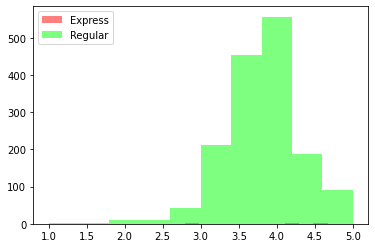

In [65]:
import matplotlib.pyplot as plt
y = plt.hist(Datos_PIA_limpio[Datos_PIA_limpio["shipping_is_express"]==1].rating,fc=(1,0,0,0.5),label="Express")
n = plt.hist(Datos_PIA_limpio[Datos_PIA_limpio["shipping_is_express"]==0].rating,fc=(0,1,0,0.5),label="Regular")
plt.legend()
plt.show()

Tratamos de contatenar dos histogramas, pero no se alcanza a visualizar el shiping_is_express debido a que el envio express no se visualiza en la escala que tenemos del shiping express por diferencias considerables entre estas.

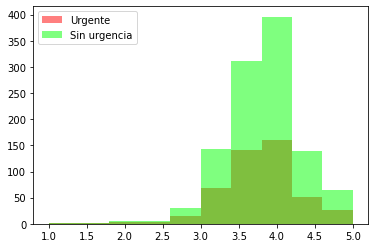

In [66]:
y = plt.hist(Datos_PIA_limpio[Datos_PIA_limpio["has_urgency_banner"]==1].rating,fc=(1,0,0,0.5),label="Urgente")
n = plt.hist(Datos_PIA_limpio[Datos_PIA_limpio["has_urgency_banner"]==0].rating,fc=(0,1,0,0.5),label="Sin urgencia")
plt.legend()
plt.show()

La mayoria de los productos de nuestra base de datos no tienen alguna marca de urgencia en cantidades es superior los pedidos que se piden sin alguna urgencia en comparacion a los urgentes

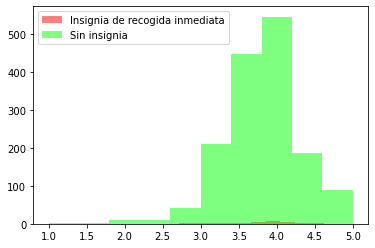

In [71]:
y = plt.hist(Datos_PIA_limpio[Datos_PIA_limpio["badge_local_product"]==1].rating,fc=(1,0,0,0.5),label="Insignia de recogida inmediata")
n = plt.hist(Datos_PIA_limpio[Datos_PIA_limpio["badge_local_product"]==0].rating,fc=(0,1,0,0.5),label="Sin insignia")
plt.legend()
plt.show()

ahora visualizamos los histogramas dependiendo la insignia de badge_loca_product el cual nos indica si el producto cuenta con insignia de recodiga inmediata, donde notamos que la mayoria de los productos no cuentan con esta insignia y en cuanto a cantidades es casi nula los productos que si tienen esta insignia

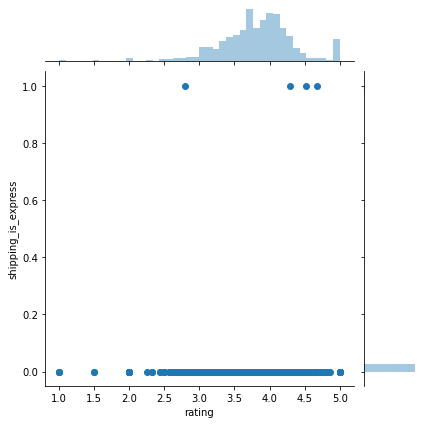

In [68]:
sns.jointplot(x='rating', y='shipping_is_express', data=Datos_PIA_limpio)

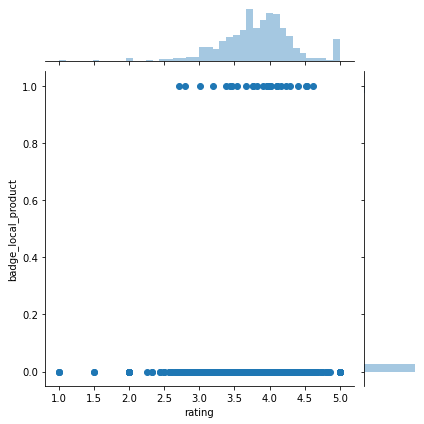

In [69]:
sns.jointplot(x='rating', y='badge_local_product', data=Datos_PIA_limpio)

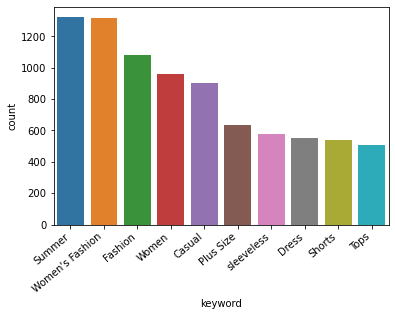

In [70]:
p=sns.barplot(x="keyword",y="count",data=etiquetas[0:10])
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.show()

Visualizamos las 10 palabras claves de busqueda para la mayoria de nuestros productos de verano, siento las palabras con mayor frecuencia "summer", "Women's Fashion", "Fashion", "Women" de lo anterior podemos inferir que nuestro mayor publico al menos en esta base de datos esta dirigido hacia las mujeres.